Accuracy: 0.9575


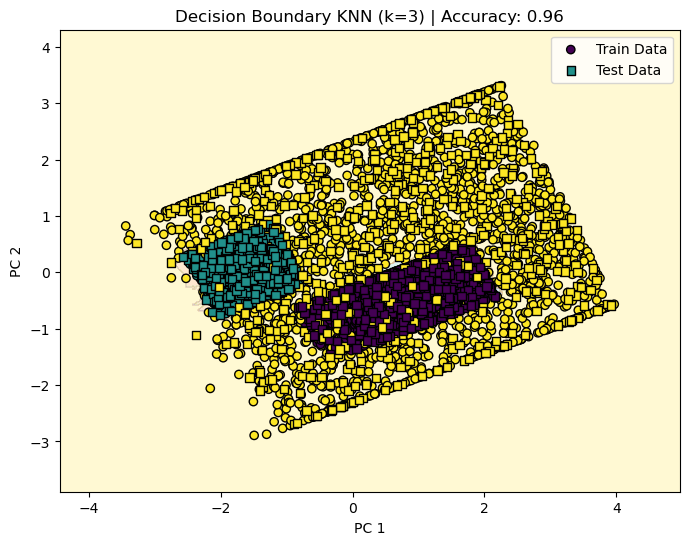

Hasil Prediksi Data Baru: Hot_Dry


c:\Users\WINDOWS 10\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import joblib

# 1. Load Data
data = pd.read_csv('../data/smart_farm_zoning_dataset.csv')
X = data[['temperature', 'pressure', 'altitude']]
y = data['zone_class']

# Encode label ke angka
le = LabelEncoder()
y_enc = le.fit_transform(y)

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42
)

# 3. Standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Latih Model KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# 5. Simpan Model & Scaler
# joblib.dump(knn, 'knn_model.pkl')
# joblib.dump(scaler, 'scaler.pkl')
# joblib.dump(le, 'label_encoder.pkl')

# 6. Evaluasi Model
y_pred = knn.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# 7. Visualisasi Decision Boundary (PCA 2D)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Latih ulang KNN untuk visualisasi
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)

# Grid untuk boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

# Prediksi grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set3)

# Plot data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, marker='o', edgecolor='k', label="Train Data")
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, marker='s', edgecolor='k', label="Test Data")

plt.title(f"Decision Boundary KNN (k=3) | Accuracy: {acc:.2f}")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()

# 8. Prediksi Data Baru
data_baru = [[30.5, 1013.25, 10.0]]
data_baru_scaled = scaler.transform(data_baru)
prediksi = knn.predict(data_baru_scaled)
prediksi_label = le.inverse_transform(prediksi)
print("Hasil Prediksi Data Baru:", prediksi_label[0])
